# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [16]:
import pandas as pd

nome_arquivo = 'demo01_transformado.csv'
demo_data = pd.read_csv(nome_arquivo)

print(demo_data.head())
print(demo_data.info())
print(demo_data.shape)


  sexo  posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
0    M               NaN               Y           0               Working   
1    F               NaN               Y           0  Commercial associate   
2    F               NaN               Y           0  Commercial associate   
3    M               NaN               Y           0               Working   
4    F               NaN               N           0               Working   

                        educacao          estado_civil    tipo_residencia  \
0  Secondary / secondary special               Married  House / apartment   
1  Secondary / secondary special  Single / not married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education               Married  House / apartment   
4              Incomplete higher               Married  House / apartment   

       idade  tempo_emprego  possui_celular  possui_fone_comercial  

In [22]:
demo_data = pd.get_dummies(demo_data, drop_first=True)

In [26]:
from sklearn.model_selection import train_test_split

X = demo_data.drop(columns=['mau'])
y = demo_data['mau']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treinamento: {X_treino.shape[0]} amostras")
print(f"Tamanho do conjunto de validação: {X_teste.shape[0]} amostras")



Tamanho do conjunto de treinamento: 11655 amostras
Tamanho do conjunto de validação: 4995 amostras


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

### 1. Definir e Treinar o Modelo da Árvore de Decisão

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
modelo = DecisionTreeClassifier(random_state=42)

modelo.fit(X_treino, y_treino)


DecisionTreeClassifier(random_state=42)

### 2. Visualizar a Árvore de Decisão

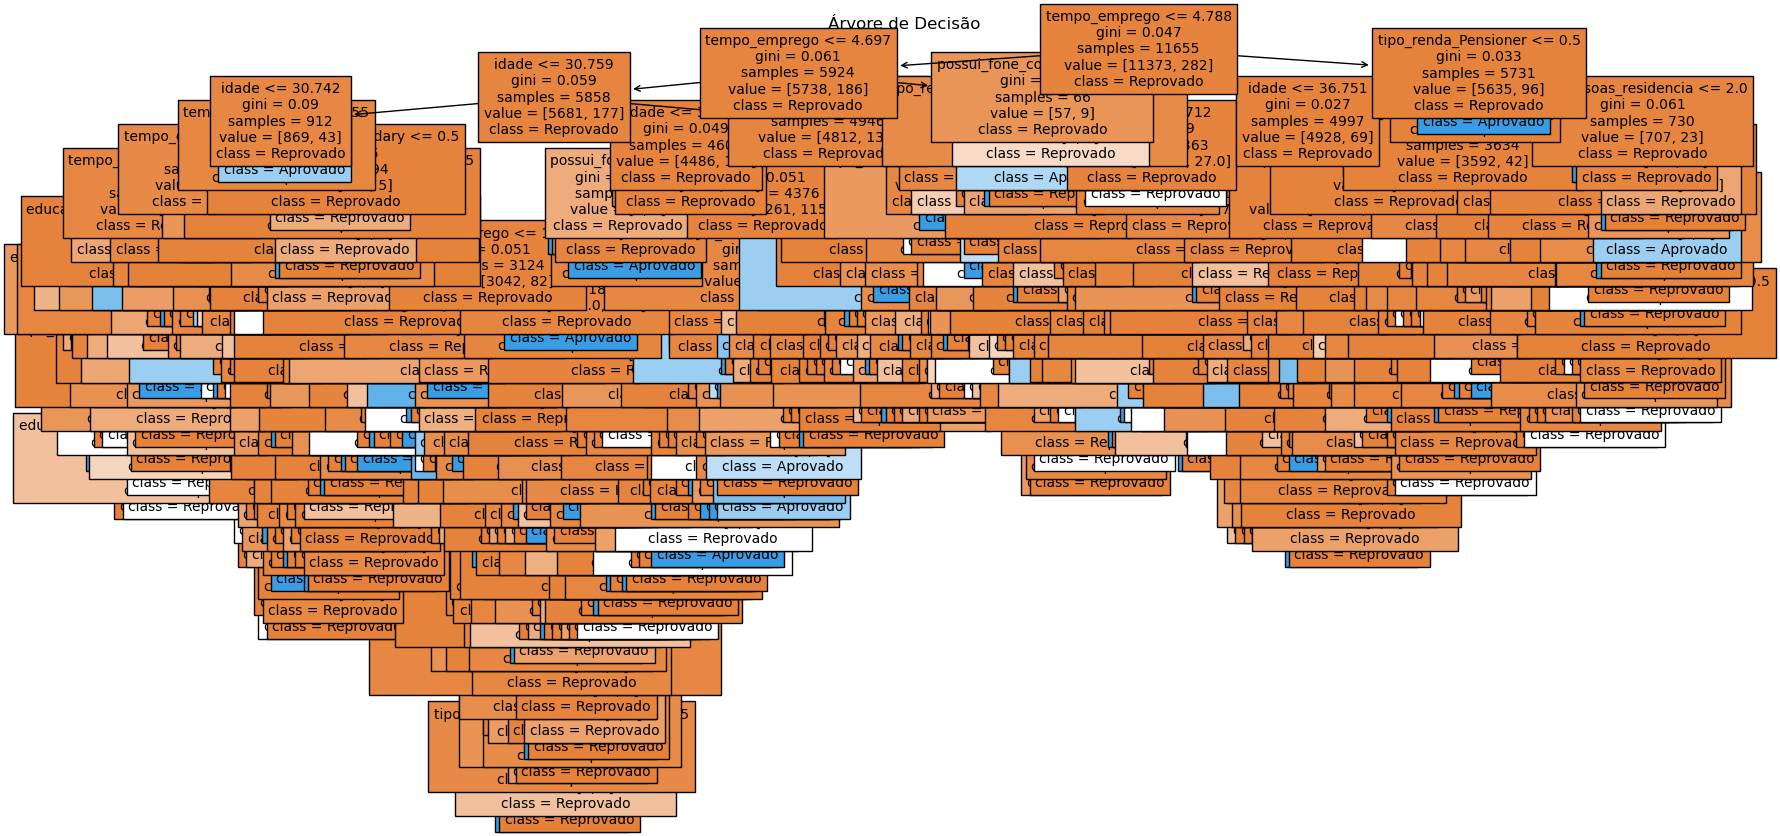

In [42]:
plt.figure(figsize=(20, 10))
plot_tree(modelo, feature_names=X.columns, class_names=['Reprovado', 'Aprovado'], filled=True, fontsize=10)
plt.title('Árvore de Decisão')
plt.show()

## 3. Matriz de Confusão

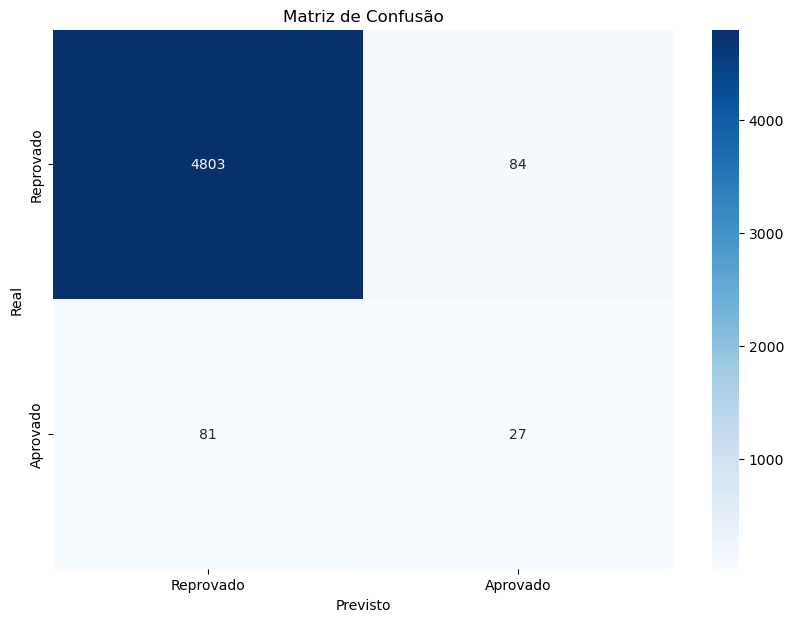

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = modelo.predict(X_teste)

matriz_confusao = confusion_matrix(y_teste, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


## 4. Calcular a Acurácia na Base de Treinamento

In [47]:
from sklearn.metrics import accuracy_score

y_treino_pred = modelo.predict(X_treino)

acuracia_treino = accuracy_score(y_treino, y_treino_pred)
print(f"Acurácia na base de treinamento: {acuracia_treino:.2f}")


Acurácia na base de treinamento: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

## 1.Classifique a base de teste de acordo com a árvore que você treinou no item 2. / 2. Produza a visualização da matriz de confusão para a base de teste.


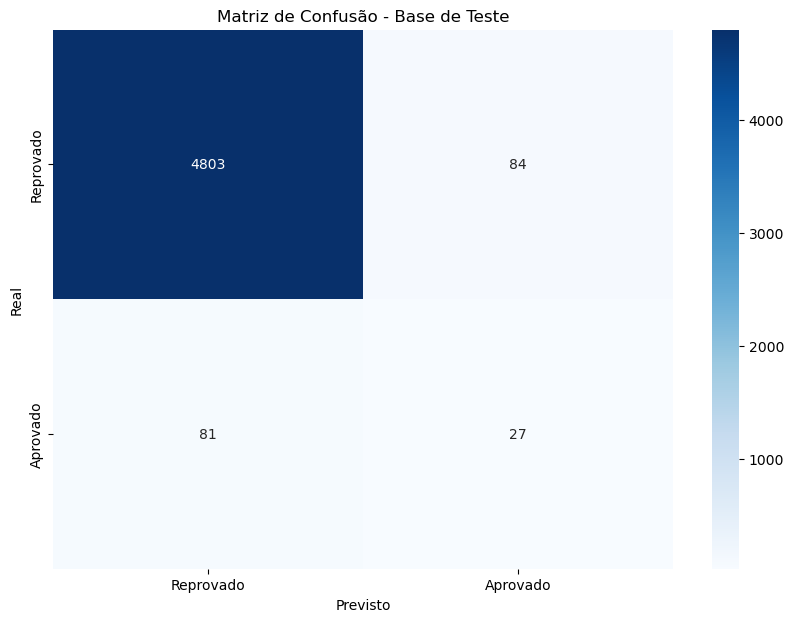

Acurácia na base de teste: 0.97


In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_teste = modelo.predict(X_teste)

matriz_confusao_teste = confusion_matrix(y_teste, y_pred_teste)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao_teste, annot=True, fmt='d', cmap='Blues', xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

acuracia_teste = accuracy_score(y_teste, y_pred_teste)
print(f"Acurácia na base de teste: {acuracia_teste:.2f}")


## 3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

In [67]:
from sklearn.metrics import accuracy_score

y_pred_treino = modelo.predict(X_treino)

acuracia_treino = accuracy_score(y_treino, y_pred_treino)
print(f"Acurácia na base de treinamento: {acuracia_treino:.2f}")

y_pred_teste = modelo.predict(X_teste)

acuracia_teste = accuracy_score(y_teste, y_pred_teste)
print(f"Acurácia na base de teste: {acuracia_teste:.2f}")


Acurácia na base de treinamento: 0.99
Acurácia na base de teste: 0.97


## 4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

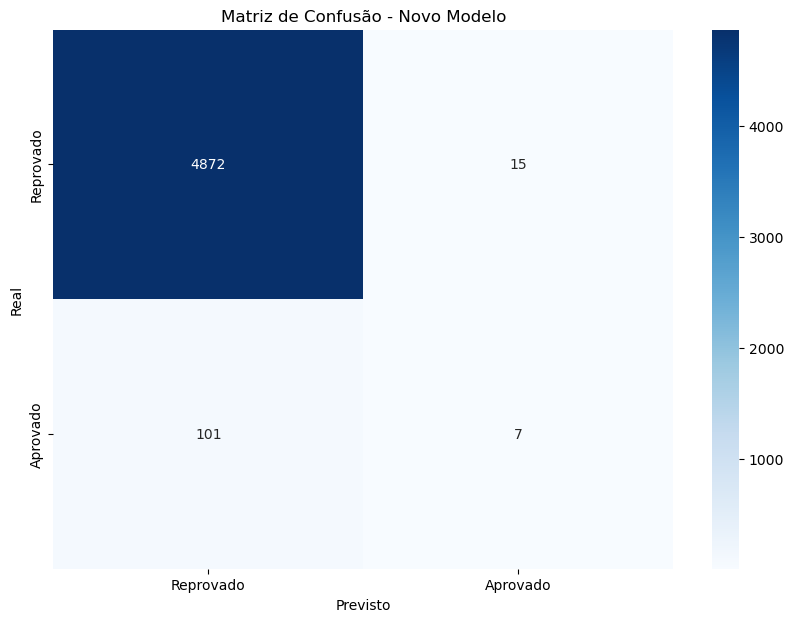

Acurácia na base de teste com o novo modelo: 0.98
Proporção de proponentes classificados como 'maus': 4.59


In [63]:
modelo_novo = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)

modelo_novo.fit(X_treino, y_treino)

y_pred_teste_novo = modelo_novo.predict(X_teste)

matriz_confusao_teste_novo = confusion_matrix(y_teste, y_pred_teste_novo)

plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusao_teste_novo, annot=True, fmt='d', cmap='Blues', xticklabels=['Reprovado', 'Aprovado'], yticklabels=['Reprovado', 'Aprovado'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Novo Modelo')
plt.show()

# Calcular a acurácia na base de teste com o novo modelo
acuracia_teste_novo = accuracy_score(y_teste, y_pred_teste_novo)
print(f"Acurácia na base de teste com o novo modelo: {acuracia_teste_novo:.2f}")

# Calcular a proporção de proponentes classificados como 'maus'
proporcao_classificados_como_maus = matriz_confusao_teste_novo[1, 0] / matriz_confusao_teste_novo[:, 1].sum()
print(f"Proporção de proponentes classificados como 'maus': {proporcao_classificados_como_maus:.2f}")


## 5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [65]:
# Calcular a acurácia se todos os contratos fossem classificados como 'bons'
y_pred_bons = [0] * len(y_teste)
acuracia_bons = accuracy_score(y_teste, y_pred_bons)
print(f"Acurácia se todos os contratos fossem classificados como 'bons': {acuracia_bons:.2f}")


Acurácia se todos os contratos fossem classificados como 'bons': 0.98
